In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'

# Part A

## Theory

We know that $\vec{F}=q(\vec{E}+\vec{v} \times \vec{B})$ and so

$$\ddot{\vec{r}}=\frac{q}{m}(\vec{E}+\vec{v} \times \vec{B})$$

If $\vec{E}=E_0\cos(kz-\omega t)\hat{x}$ and $\vec{B}=\frac{E_0}{c}\cos(kz-\omega t) \hat{y}$ then we get the following system of ODES:

$$\ddot{x}=\frac{E_0 q}{m}\left(\cos(kz-\omega t)-\frac{\dot{z}}{c}\cos(kz-\omega t)\right) $$

$$\ddot{y}=0 $$

$$\ddot{z}=\frac{E_0q}{m}\frac{\dot{x}}{c} \cos(kz-\omega t)$$

Noting that $c=\frac{k}{\omega}$ we can write

$$\cos(kz-\omega t)=\cos(k(z-ct)) $$

Instead of solving $x$, $y$ and $z$ as a function of $t$. Lets solve them for a function of $ct$. With the dots now representing derivatives with repsect to $ct$ we now have

$$\ddot{x}=\left(\frac{E_0 q}{mc^2} \right)(1-\dot{z})\cos(k(z-ct)) $$

$$\ddot{y}=0$$
 
$$\ddot{z}=\left(\frac{E_0 q}{mc^2} \right)\dot{x}\cos(k(z-ct)) $$

## Solve ODE with Initial Conditions

In [2]:
def elec_motion(S, t):
    x, vx, y, vy, z, vz = S
    dSdt =  [vx, 
             (1-vz)*np.sin(z-t),
             vy,
             0,
             vz,
             vx*np.sin(z-t)]
    return dSdt

In [3]:
S0 = [0,0,0,0,0,0]

t = np.linspace(0, 10*np.pi, 10000)
sol = odeint(elec_motion, S0, t)

## Plot the Resulting Motion

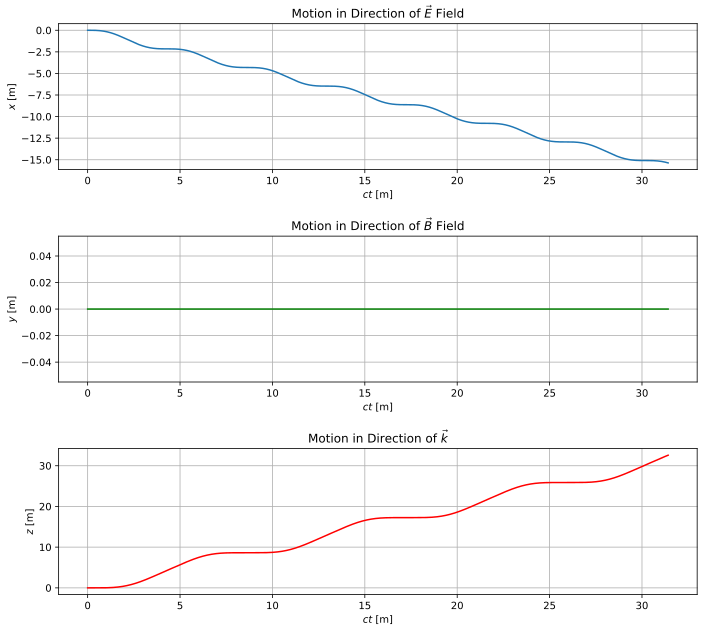

In [4]:
fig, ax = plt.subplots(3,1,figsize=(10,9))

ax[0].plot(t,sol[:,0])
ax[0].set_ylabel('$x$ [m]')
ax[0].set_title(r'Motion in Direction of $\vec{E}$ Field')

ax[1].plot(t,sol[:,2], color='g')
ax[1].set_ylabel('$y$ [m]')
ax[1].set_title(r'Motion in Direction of $\vec{B}$ Field')

ax[2].plot(t,sol[:,4], color='r')
ax[2].set_ylabel('$z$ [m]')
ax[2].set_title(r'Motion in Direction of $\vec{k}$')

[a.grid() for a in ax.ravel()]
[a.set_xlabel('$ct$ [m]') for a in ax.ravel()]

fig.tight_layout()
plt.show()

# Part B

## Theory

The ODES only slightly change form now. Recalling that the derivatives are with respect to $ct$ we have

$$\ddot{x}=\left(\frac{E_0 q}{mc^2} \right)(1-\dot{z})\cos(k(z-ct)) - \gamma c \dot{x} $$

$$\ddot{y}= - \gamma c \dot{y}$$
 
$$\ddot{z}=\left(\frac{E_0 q}{mc^2} \right)\dot{x}\cos(k(z-ct))- \gamma c \dot{z} $$


Below we use $a$ as $\gamma$ (it provides a sufficient scaling factor to $E_0 q/mc^2$)

In [5]:
a = 1

In [6]:
def elec_motion_fric(S, t):
    x, vx, y, vy, z, vz = S
    dSdt =  [vx, 
             (1-vz)*np.sin(z-t)-a*vx,
             vy,
             -a*vy,
             vz,
             vx*np.sin(z-t)-a*vz]
    return dSdt

In [7]:
S0 = [0,0,0,0,0,0]

t = np.linspace(0, 20*np.pi, 10000)
sol = odeint(elec_motion_fric, S0, t)

## Plot the Resulting Motion

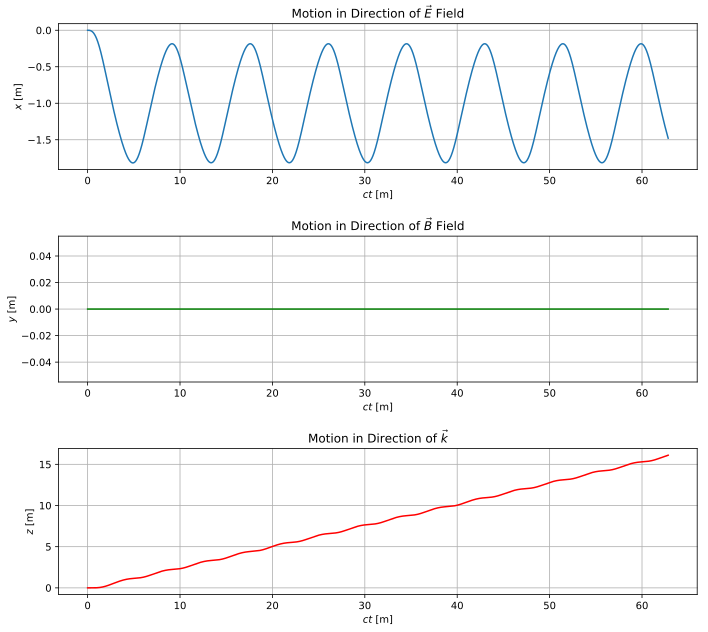

In [8]:
fig, ax = plt.subplots(3,1,figsize=(10,9))

ax[0].plot(t,sol[:,0])
ax[0].set_ylabel('$x$ [m]')
ax[0].set_title(r'Motion in Direction of $\vec{E}$ Field')

ax[1].plot(t,sol[:,2], color='g')
ax[1].set_ylabel('$y$ [m]')
ax[1].set_title(r'Motion in Direction of $\vec{B}$ Field')

ax[2].plot(t,sol[:,4], color='r')
ax[2].set_ylabel('$z$ [m]')
ax[2].set_title(r'Motion in Direction of $\vec{k}$')

[a.grid() for a in ax.ravel()]
[a.set_xlabel('$ct$ [m]') for a in ax.ravel()]

fig.tight_layout()
plt.show()

The friction force appears to kill off the higher order frequency terms in $x$ observed by the system without damping.